# Desafío - Árboles de Regresión
## Daniela Hurtado

__Descripción__

* Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.
* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable Sale_Price.

# Ejercicio 1: Preparación del ambiente de trabajo

* Importe las librerías clásicas a utilizar.
* Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase DecisionTreeRegressor .
* De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
* Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (16, 10)
plt.style.use('seaborn')

import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
MS_SubClass           2930 non-null object
MS_Zoning             2930 non-null object
Lot_Frontage          2930 non-null int64
Lot_Area              2930 non-null int64
Street                2930 non-null object
Alley                 2930 non-null object
Lot_Shape             2930 non-null object
Land_Contour          2930 non-null object
Utilities             2930 non-null object
Lot_Config            2930 non-null object
Land_Slope            2930 non-null object
Neighborhood          2930 non-null object
Condition_1           2930 non-null object
Condition_2           2930 non-null object
Bldg_Type             2930 non-null object
House_Style           2930 non-null object
Overall_Qual          2930 non-null object
Overall_Cond          2930 non-null object
Year_Built            2930 non-null int64
Year_Remod_Add        2930 non-null int64
Roof_Style            2930 non-null o

In [4]:
# dimensiones
df.shape

(2930, 81)

In [5]:
# primeras 2
df.head(2)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014


# Ejercicio 2: Feature engineering

Identifique si el dtype de cada pd.Serie en nuestra base de datos se considera 'object' o no. Para todas las variables que sean 'object' , realice lo siguiente:

1. Genere una recodificación $K-1$ en cada variable. Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. Pueden utilizar la función pd.get_dummies con la opción drop_first para ello.
2. Utilizando el método pd.concat , concatene a los atributos creados en la base de datos. tip: No se olvide de eliminar los atributos recodificados, de esta forma evitará un aumento artificial del desempeño del modelo.

In [6]:
# hacemos una copia para tarabajar sobre ella y ver como van cambiando las dimensiones
df_c = df

In [7]:
# observamos el tipo de dato
df_c.dtypes

MS_SubClass            object
MS_Zoning              object
Lot_Frontage            int64
Lot_Area                int64
Street                 object
Alley                  object
Lot_Shape              object
Land_Contour           object
Utilities              object
Lot_Config             object
Land_Slope             object
Neighborhood           object
Condition_1            object
Condition_2            object
Bldg_Type              object
House_Style            object
Overall_Qual           object
Overall_Cond           object
Year_Built              int64
Year_Remod_Add          int64
Roof_Style             object
Roof_Matl              object
Exterior_1st           object
Exterior_2nd           object
Mas_Vnr_Type           object
Mas_Vnr_Area            int64
Exter_Qual             object
Exter_Cond             object
Foundation             object
Bsmt_Qual              object
                       ...   
Kitchen_AbvGr           int64
Kitchen_Qual           object
TotRms_Abv

In [8]:
# creamos un nueva variable donde guardaremos las variables tipo objeto
variable_objeto = []

for colname, serie in df_c.iteritems():
    if serie.dtype =='O':
        variable_objeto.append(colname)
    
variable_objeto

['MS_SubClass',
 'MS_Zoning',
 'Street',
 'Alley',
 'Lot_Shape',
 'Land_Contour',
 'Utilities',
 'Lot_Config',
 'Land_Slope',
 'Neighborhood',
 'Condition_1',
 'Condition_2',
 'Bldg_Type',
 'House_Style',
 'Overall_Qual',
 'Overall_Cond',
 'Roof_Style',
 'Roof_Matl',
 'Exterior_1st',
 'Exterior_2nd',
 'Mas_Vnr_Type',
 'Exter_Qual',
 'Exter_Cond',
 'Foundation',
 'Bsmt_Qual',
 'Bsmt_Cond',
 'Bsmt_Exposure',
 'BsmtFin_Type_1',
 'BsmtFin_Type_2',
 'Heating',
 'Heating_QC',
 'Central_Air',
 'Electrical',
 'Kitchen_Qual',
 'Functional',
 'Fireplace_Qu',
 'Garage_Type',
 'Garage_Finish',
 'Garage_Qual',
 'Garage_Cond',
 'Paved_Drive',
 'Pool_QC',
 'Fence',
 'Misc_Feature',
 'Sale_Type',
 'Sale_Condition']

In [9]:
# cant. de variables
len(variable_objeto)

46

In [10]:
# generamos un nuevo objeto con variables dummies
df_dummy = pd.get_dummies(df_c,prefix=variable_objeto,prefix_sep='_',drop_first=True, dummy_na=False)

In [11]:
# verificamos consultando las dos primeras filas
df_dummy.head(2)

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,0,0,0,0,1,0,0,0,1,0
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,0,1,0,0,0,1,0


In [12]:
# consultamos dimensiones
df_dummy.shape

(2930, 307)

# Ejercicio 3: Primer modelo

* Genere muestras de entrenamiento y validación con 'Sale_Price' como vector objetivo y los atributos de la base de datos como matriz.
* Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.
* Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiperparámetros. Reporte las principales métricas de desempeño.
* Comente sobre el desempeño.

In [13]:
# Separamos los vectores objetivo y atributos

# Vector objetivo
y_vec = df_dummy['Sale_Price']

# Matriz de atributos
x_mat = df_dummy.drop(columns=['Sale_Price'])

# Generamos conjunto de entrenamiento (train) y validación (test), con semilla pseudoaleatoria y segmentación del 33%
X_train, X_test, y_train, y_test = train_test_split(x_mat, y_vec, test_size=.33, random_state= 23748)

In [14]:
# Implementamos nuestro modelo sin modificar hiperparametros
dec_tree = DecisionTreeRegressor().fit(X_train, y_train)

In [15]:
# Métricas
print("Test MSE:", mean_squared_error(y_test, dec_tree.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test, dec_tree.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, dec_tree.predict(X_test)).round(5))

Test MSE: 1742184066.37952
Test MAE: 17000.0
Test R2: 0.70888


# Ejercicio 4: Importancia relativa

* Implemente el método plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.
* Comente sobre cuáles son los principales 10 atributos que afectan la predicción de Sale_Price .
* Separe éstos 10 atributos en una nueva base de datos, junto con el vector objetivo.

In [16]:
# Función para obtener el grafico de importancia relativa
def plot_importance(fit_model, feat_names):
    """TODO: Docstring for plot_importance.

    :fit_model: TODO
    :: TODO
    :returns: TODO

    """
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(feat_names)), tmp_importance[sort_importance])
    plt.yticks(range(len(feat_names)), names, rotation=0)

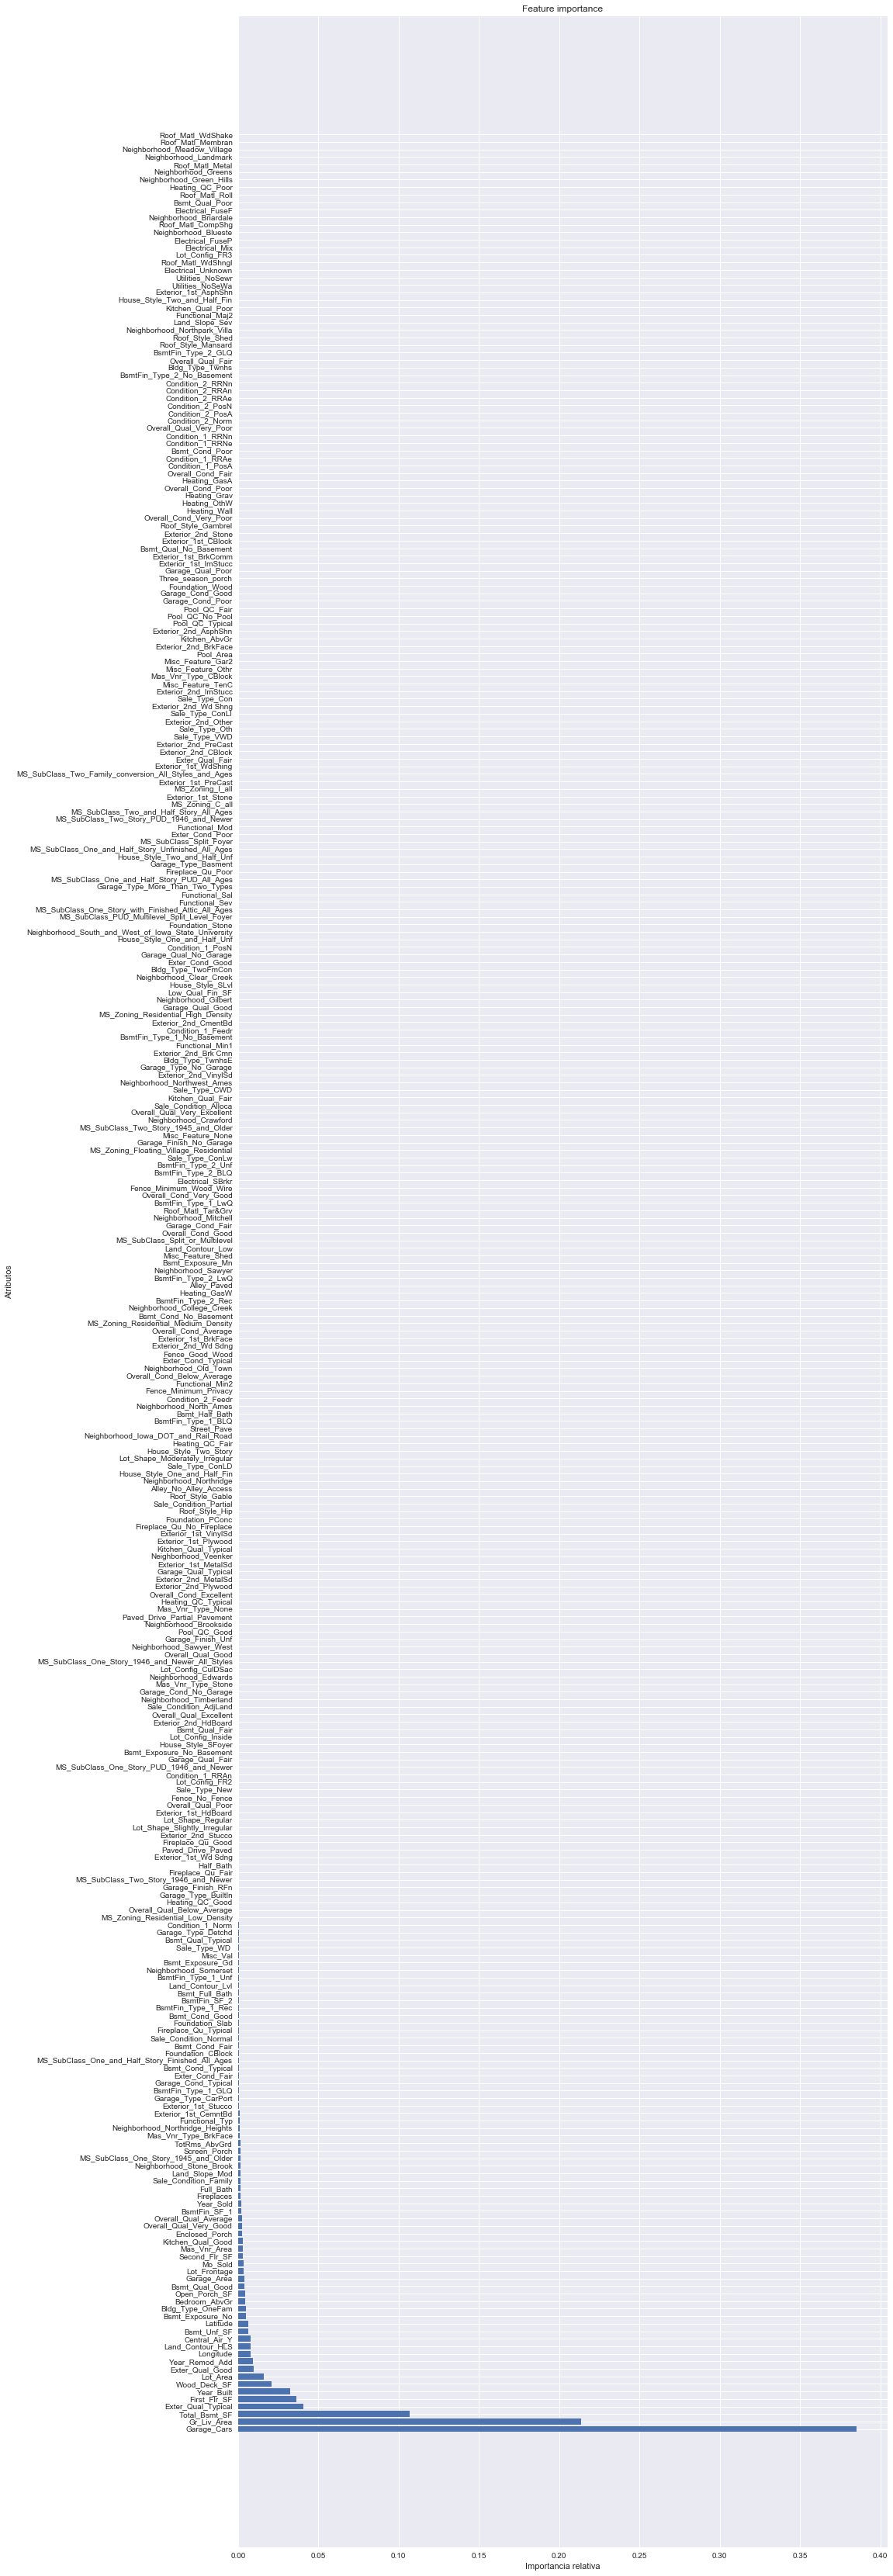

In [17]:
# Reporte de importancia relativa
plt.figure(figsize=(15,60))
plot_importance(dec_tree, x_mat.columns)
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');

In [18]:
# Los 10 atributos con mayor importancia son ___: y le agrego sale_price. Creamos una nueva data
new_df= df_dummy[['Garage_Cars', 'Gr_Liv_Area', 'Total_Bsmt_SF',
                     'Exter_Qual_Typical','First_Flr_SF', 'Year_Built',
                    'Wood_Deck_SF','Lot_Area','Year_Remod_Add',
                  'Land_Contour_HLS', 'Sale_Price']].copy()

In [19]:
# Verificamos con un head
new_df.head()

,Garage_Cars,Gr_Liv_Area,Total_Bsmt_SF,Exter_Qual_Typical,First_Flr_SF,Year_Built,Wood_Deck_SF,Lot_Area,Year_Remod_Add,Land_Contour_HLS,Sale_Price
0,2,1656,1080,1,1656,1960,210,31770,1960,0,215000
1,1,896,882,1,896,1961,140,11622,1961,0,105000
2,1,1329,1329,1,1329,1958,393,14267,1958,0,172000
3,2,2110,2110,0,2110,1968,0,11160,1968,0,244000
4,2,1629,928,1,928,1997,212,13830,1998,0,189900


# Ejercicio 5: Refactorización del modelo y pickling

* En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de
entrenamiento y validación.
* Dentro de los datos de entrenamiento genere una búsqueda de grila con GridSearchCV
utilizando los siguientes hiperparámetros:
    * Máximo de atributos: Evalúe todos los posibles atributos.
    * Máximo de profundidad: entre 1 a 32.
    * Validaciones cruzadas : 5.
* Reporte la mejor combinación de hiperparámetros y su desempeño asociado. Compare el
desempeño en la muestra de validación con el modelo por defecto.

__Pickling__

* Ahora generaremos una serialización de nuestro modelo depurado, y nuestros conjuntos de
entrenamiento y validación depurados. Para ello importe el módulo pickle .
* pickle contiene la función dump , que permite guardar el modelo desarrollado. La forma
canónica para desarrollar el pickling es:

pickle.dump(OBJETO_CON_EL_MODELO, open('nombre-apellido-actividad07.sav','wb'))

* Envíe su modelo y conjuntos de entrenamiento a un compañero.

In [20]:
# Separamos los vectores objetivo y atributos
y_vec2 = new_df.loc[:,'Sale_Price']
x_mat2= new_df.loc[:,'Garage_Cars': 'Land_Contour_HLS']

# Generamos conjunto de entrenamiento (train) y validación (test), con semilla pseudoaleatoria y segmentación del 33%
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_mat2, y_vec2, test_size=.33, random_state= 23748)

In [21]:
# importamos la clase GridSearchCV
from sklearn.model_selection import GridSearchCV

# definimos los parametros: max_depth:con una profundidad de ramas hasta 32, max_features: evaluando todos los atributos en la matriz
parametros= {'max_depth': np.linspace(1, 32, 32), 'max_features': list(range(1,X_train2.shape[1]))}

dec_tree_grid_cv = GridSearchCV(DecisionTreeRegressor(), 
                                # param_grid colocamos los parametros definidos anteriormente
                                param_grid= parametros, 
                                # Con 5 validaciones cruzadas
                                cv=5, 
                                # Ocupando todos los núcleos del computador
                                n_jobs=-1).fit(X_train2, y_train2)

In [22]:
dec_tree_grid_cv

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]), 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
# mejor combinación de hiperparametros
dec_tree_grid_cv.best_params_

{'max_depth': 6.0, 'max_features': 8}

In [24]:
# El desempeño por defecto
dec_tree_grid_cv.best_score_

0.7644656488885005

In [25]:
# solicitamos las metricas del modelo refactorizado
print("Test MSE:", mean_squared_error(y_test2, dec_tree_grid_cv.predict(X_test2)).round(5))
print("Test MAE:", median_absolute_error(y_test2, dec_tree_grid_cv.predict(X_test2)).round(5))
print("Test R2:", r2_score(y_test2, dec_tree_grid_cv.predict(X_test2)).round(5))

Test MSE: 1616057378.26192
Test MAE: 17998.52308
Test R2: 0.72996


In [26]:
# pickling del modelo desarrollado
pickle.dump(dec_tree_grid_cv, open('daniela_hurtado_actividad07.sav', 'wb'))


In [27]:
pickle.dump(X_train2, open("daniela_hurtado_actividad07_X_training.sav","wb"))
pickle.dump(y_train2, open("daniela_hurtado_actividad07_y_training.sav","wb"))
pickle.dump(X_test2, open("daniela_hurtado_actividad07_X_testing.sav","wb"))
pickle.dump(y_test2, open("daniela_hurtado_actividad07_y_testing.sav","wb"))